# Logistic Regression Classifier

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from dataloaders import SKLMatchedPairsCGL
from evaluation import evaluate

## Unmatched halves without hyperparameter tuning

### Load data

In [17]:
data0_dir = 'data/b_0_c_1_dT_01_t_1e03'
data1_dir = 'data/b_0_c_1_dT_01_t_1e04'
data = SKLMatchedPairsCGL(data0_dir, data1_dir, train_match='unmatched_halves', seed=1234)

### fit classifier

In [18]:
clf = LogisticRegression(max_iter = 1000, random_state = data.rng.integers(data.seed))
clf.fit(data.X_train, data.y_train)

LogisticRegression(max_iter=1000, random_state=np.int64(421))

### evaluate

In [19]:
y_dev_pred = clf.predict(data.X_dev)
print(f'Logistic Regression Accuracy: {accuracy_score(data.y_dev, y_dev_pred):.2f}')

Logistic Regression Accuracy: 0.67


## Matched pairs without hyperparameter tuning

### Load data

In [20]:
data0_dir = 'data/b_0_c_1_dT_01_t_1e03'
data1_dir = 'data/b_0_c_1_dT_01_t_1e04'
data = SKLMatchedPairsCGL(data0_dir, data1_dir, train_match='half_matches', seed=1234)

### fit classifier

In [21]:
clf = LogisticRegression(max_iter = 1000, random_state = data.rng.integers(data.seed))
clf.fit(data.X_train, data.y_train)

LogisticRegression(max_iter=1000, random_state=np.int64(421))

### evaluate

In [22]:
y_dev_pred = clf.predict(data.X_dev)
print(f'Logistic Regression Accuracy: {accuracy_score(data.y_dev, y_dev_pred):.2f}')

Logistic Regression Accuracy: 0.68


## Penalty mode evaluation

In [13]:
data = SKLMatchedPairsCGL(data0_dir, data1_dir, seed=1234)

penalties = ['l1', 'l2', 'elasticnet', None]
theta = {}

for penalty in penalties:

    clf = LogisticRegression(max_iter = 1000, random_state = data.rng.integers(data.seed))
    clf.fit(data.X_train, data.y_train)
    y_dev_pred = clf.predict(data.X_dev)
    print('The penalty mode is ', penalty)
    print(f'Logistic Regression Accuracy: {accuracy_score(data.y_dev, y_dev_pred):.2f}')

    theta[penalty] = clf.coef_.reshape((2, 32, 32))

The penalty mode is  l1
Logistic Regression Accuracy: 0.73
The penalty mode is  l2
Logistic Regression Accuracy: 0.73
The penalty mode is  elasticnet
Logistic Regression Accuracy: 0.73
The penalty mode is  None
Logistic Regression Accuracy: 0.73


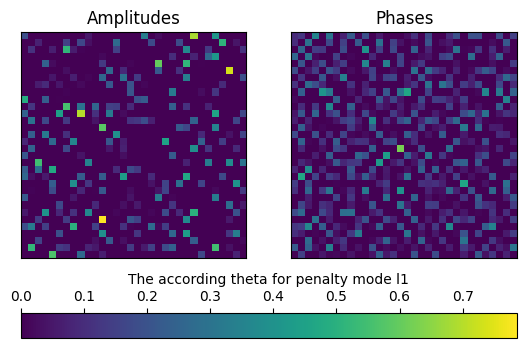

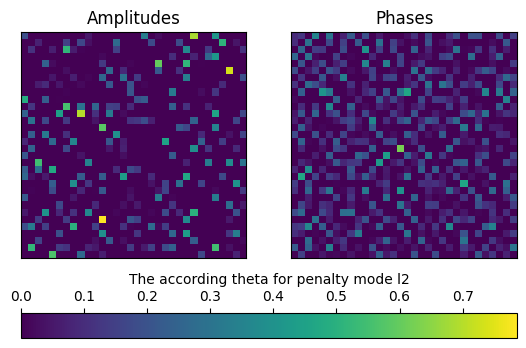

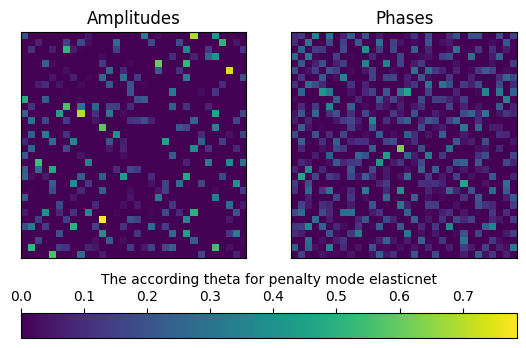

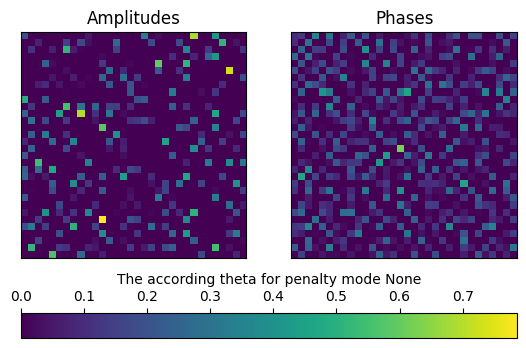

In [16]:
for penalty in penalties:
    fig, (ax1, ax2) = plt.subplots(1, 2)

    vmin = 0.0
    vmax = theta[penalty].max()

    im1 = ax1.imshow(theta[penalty][0], vmin=vmin, vmax=vmax)
    ax2.imshow(theta[penalty][1], vmin=vmin, vmax=vmax)

    ax1.set_xticks([])
    ax2.set_xticks([])
    ax1.set_yticks([])
    ax2.set_yticks([])

    ax1.set_title('Amplitudes')
    ax2.set_title('Phases')

    cbar = fig.colorbar(im1, ax=[ax1, ax2], orientation='horizontal')
    cbar.ax.xaxis.set_ticks_position('top')
    cbar.ax.xaxis.set_label_position('top')
    if penalty == None:
        penalty = 'None'
    cbar.set_label('The according theta for penalty mode ' + penalty)

    plt.savefig('figures/logistic_regression_'  + penalty + '.pdf', bbox_inches='tight')